In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [158]:
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPM/PM10                       2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


In [160]:
data.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                 11
NO2                                 13
RSPM/PM10                            4
PM 2.5                            2879
dtype: int64

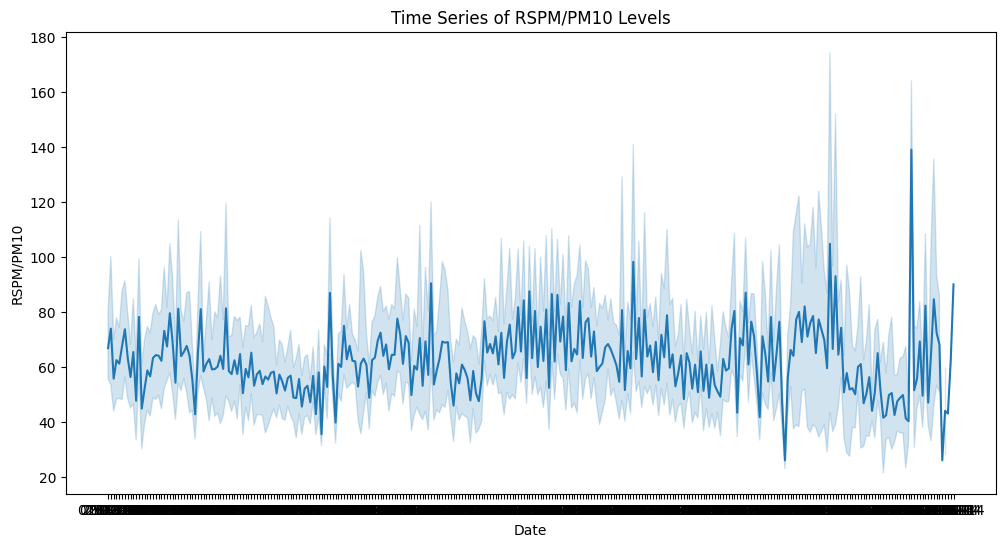

In [161]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Sampling Date', y='RSPM/PM10', data=data)
plt.title('Time Series of RSPM/PM10 Levels')
plt.xlabel('Date')
plt.ylabel('RSPM/PM10')
plt.show()


In [162]:
mean_so2 = data['SO2'].mean()
data['SO2'] = data['SO2'].fillna(mean_so2)
data['SO2'] = data['SO2'].astype(float)

In [163]:
mean_no2 = data['NO2'].mean()
data['NO2'] = data['NO2'].fillna(mean_no2)
data['NO2'] = data['NO2'].astype(float)

In [164]:
mean_RSPM = data['RSPM/PM10'].mean()
data['RSPM/PM10'] = data['RSPM/PM10'].fillna(mean_RSPM)
data['RSPM/PM10'] = data['RSPM/PM10'].astype(float)

In [165]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [166]:
data.isnull().sum()

Stn Code                             0
Sampling Date                        0
State                                0
City/Town/Village/Area               0
Location of Monitoring Station       0
Agency                               0
Type of Location                     0
SO2                                  0
NO2                                  0
RSPM/PM10                            0
PM 2.5                            2879
dtype: int64

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2879 non-null   float64
 8   NO2                             2879 non-null   float64
 9   RSPM/PM10                       2879 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


# Average SO2 and NO2 levels in various areas and monitoring stations

In [168]:
grouped_data = data.groupby(['City/Town/Village/Area', 'Location of Monitoring Station'])[['SO2', 'NO2', 'RSPM/PM10']].mean(numeric_only=True).reset_index()

Text(0.5, 1.0, 'Average SO2 Levels by Area and Monitoring Station')

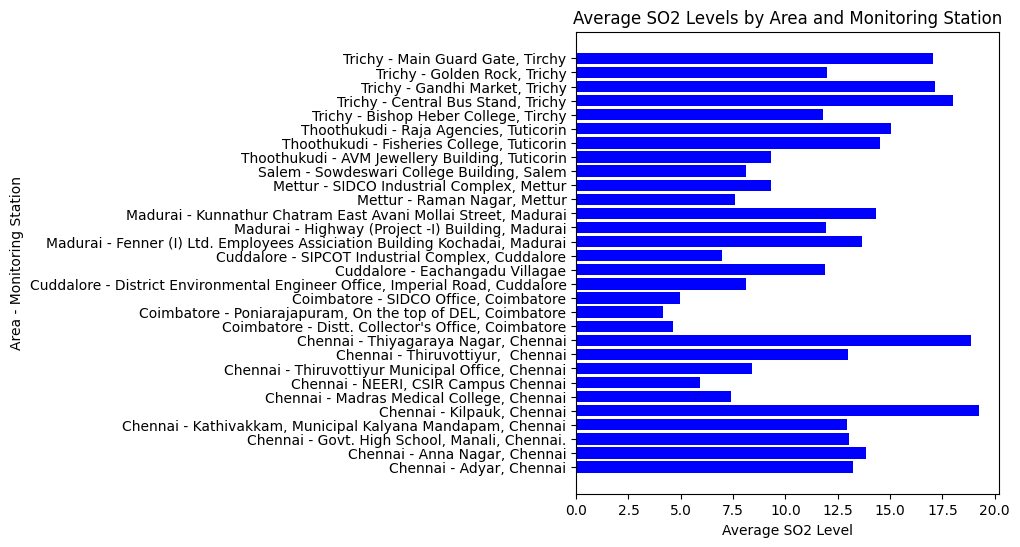

In [171]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for average SO2 levels
plt.subplot(1, 2, 1)  # Subplot for SO2
plt.barh(grouped_data['City/Town/Village/Area'] + ' - ' + grouped_data['Location of Monitoring Station'], grouped_data['SO2'], color='b')
plt.xlabel('Average SO2 Level')
plt.ylabel('Area - Monitoring Station')
plt.title('Average SO2 Levels by Area and Monitoring Station')


Text(0.5, 1.0, 'Average NO2 Levels by Area and Monitoring Station')

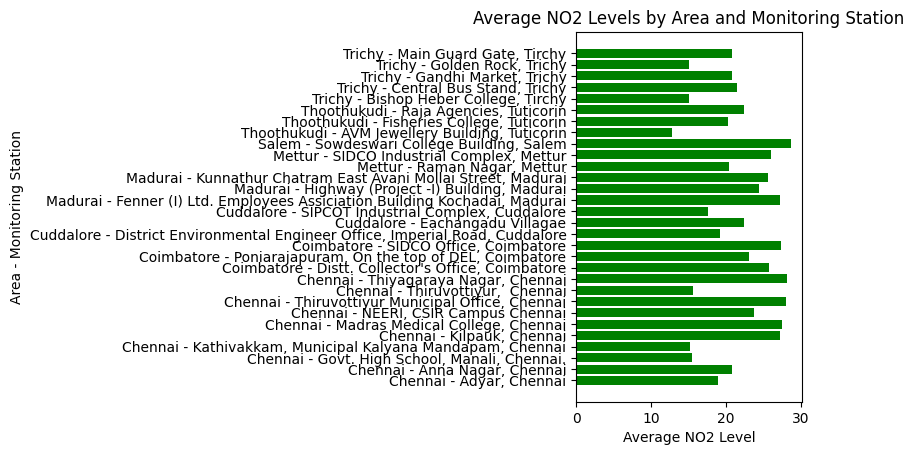

In [172]:
# Create a bar plot for average NO2 levels
plt.subplot(1, 2, 2)  # Subplot for NO2
plt.barh(grouped_data['City/Town/Village/Area'] + ' - ' + grouped_data['Location of Monitoring Station'], grouped_data['NO2'], color='g')
plt.xlabel('Average NO2 Level')
plt.ylabel('Area - Monitoring Station')
plt.title('Average NO2 Levels by Area and Monitoring Station')

Text(0.5, 1.0, 'Average RSPM Levels by Area and Monitoring Station')

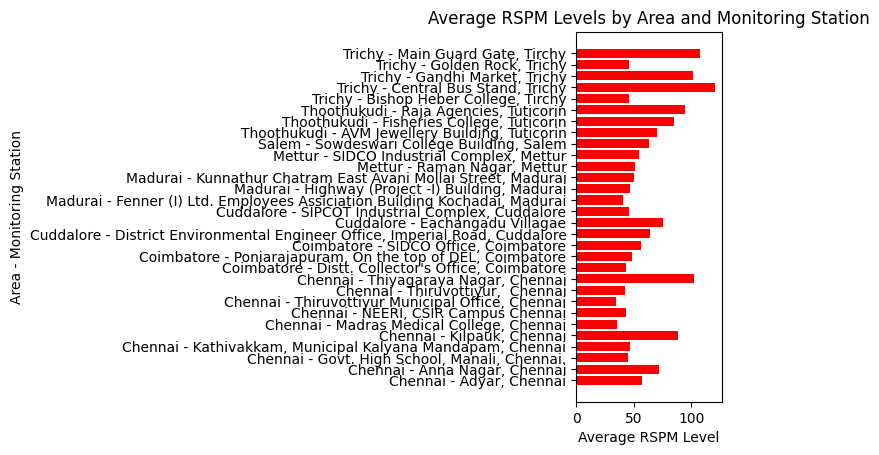

In [173]:
plt.subplot(1, 3, 3)  # Subplot for RSPM
plt.barh(grouped_data['City/Town/Village/Area'] + ' - ' + grouped_data['Location of Monitoring Station'], grouped_data['RSPM/PM10'], color='r')
plt.xlabel('Average RSPM Level')
plt.ylabel('Area - Monitoring Station')
plt.title('Average RSPM Levels by Area and Monitoring Station')

In [174]:
data.columns

Index(['Stn Code', 'Sampling Date', 'State', 'City/Town/Village/Area',
       'Location of Monitoring Station', 'Agency', 'Type of Location', 'SO2',
       'NO2', 'RSPM/PM10', 'PM 2.5'],
      dtype='object')

# Encoding Categorical columns

In [175]:
categorical_columns = ['State', 'City/Town/Village/Area','Location of Monitoring Station','Agency','Type of Location']

In [177]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [178]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-14,0,0,14,1,0,11.0,17.0,55.0,NaN
1,38,01-07-14,0,0,14,1,0,13.0,17.0,45.0,NaN
2,38,21-01-14,0,0,14,1,0,12.0,18.0,50.0,NaN
3,38,23-01-14,0,0,14,1,0,15.0,16.0,46.0,NaN
4,38,28-01-14,0,0,14,1,0,13.0,14.0,42.0,NaN


<ipython-input-179-53fe516a88e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

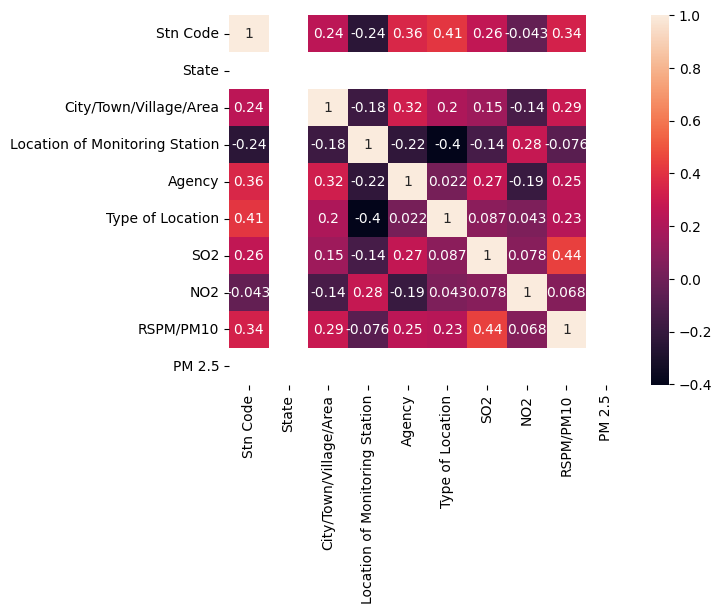

In [179]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [184]:
X = data.drop(['Sampling Date','RSPM/PM10','State','PM 2.5'],axis=1)
y = data['RSPM/PM10']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

# Extracting Important Features

In [181]:
feature_importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [182]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                          Feature  Importance
5                             SO2    0.392486
0                        Stn Code    0.234505
6                             NO2    0.210523
1          City/Town/Village/Area    0.086671
2  Location of Monitoring Station    0.057180
4                Type of Location    0.013520
3                          Agency    0.005114


In [197]:
important_features = ['Stn Code','City/Town/Village/Area','Location of Monitoring Station','SO2', 'NO2']
X = data[important_features]
# Select the target variable
y = data['RSPM/PM10']

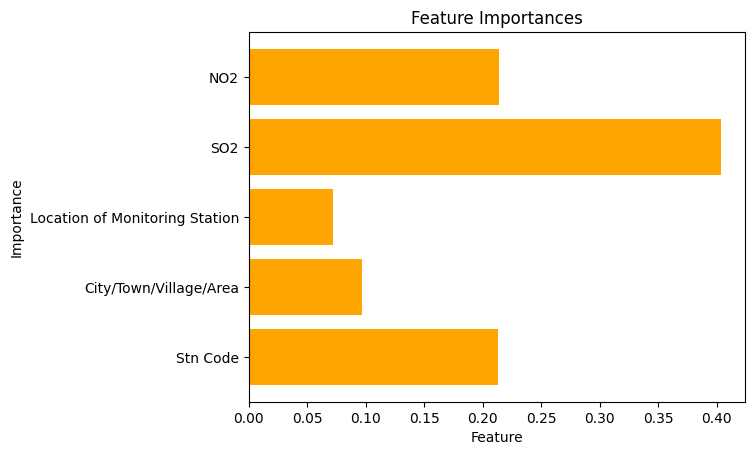

In [206]:
feature_importances = model.feature_importances_
plt.barh(important_features, feature_importances,color='orange')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [199]:
# Make predictions
y_pred = model.predict(X_test)

In [200]:
# Evaluate the model (calculate Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 537.06


# Comparison On Multiple Regressors

In [209]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor()),
    ('Random Forest Regression', RandomForestRegressor())
]


In [210]:
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')

Linear Regression - Mean Squared Error: 742.43
Decision Tree Regression - Mean Squared Error: 725.51
Random Forest Regression - Mean Squared Error: 536.96


# Grid Search CV for Randomforest regressor


In [211]:
from sklearn.model_selection import  GridSearchCV

In [213]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [214]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [215]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [216]:
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [217]:
y_pred = best_rf_model.predict(X_test)

# Evaluate the model (calculate Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Best Random Forest Model - Mean Squared Error: {mse:.2f}')

Best Random Forest Model - Mean Squared Error: 465.73
